In [7]:
library(tidyverse)
library(psych)
library(lattice)
library(RColorBrewer)

Step 1: Loading data
-----------------------

In [8]:
survey = read_csv('/home/finc/Dropbox/Projects/SelfReg/data/behavioral/mkturk_survey_responses.csv')
length(unique(survey$worker))

Parsed with column specification:
cols(
  `Unnamed: 0` = col_integer(),
  worker = col_character(),
  item_ID = col_character(),
  coded_response = col_double(),
  item_text = col_character(),
  response_text = col_character(),
  options = col_character(),
  survey = col_character(),
  item_num = col_integer(),
  trial_type = col_character()
)


[1] 522

Step 2: Spreading data frame
-----------------------

In [9]:
survey_wide <- survey %>% 
    select(worker, trial_type, coded_response) %>% 
    spread(key = trial_type, value = coded_response)

Step 3: Correlation calculation
-----------------------

In [10]:
corr_pears_all = corr.test(survey_wide[2:41])  
corr_poly_all = polychoric(survey_wide[2:41])  


Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
“780 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully.”Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”

Step 4: Plotting
-----------------------

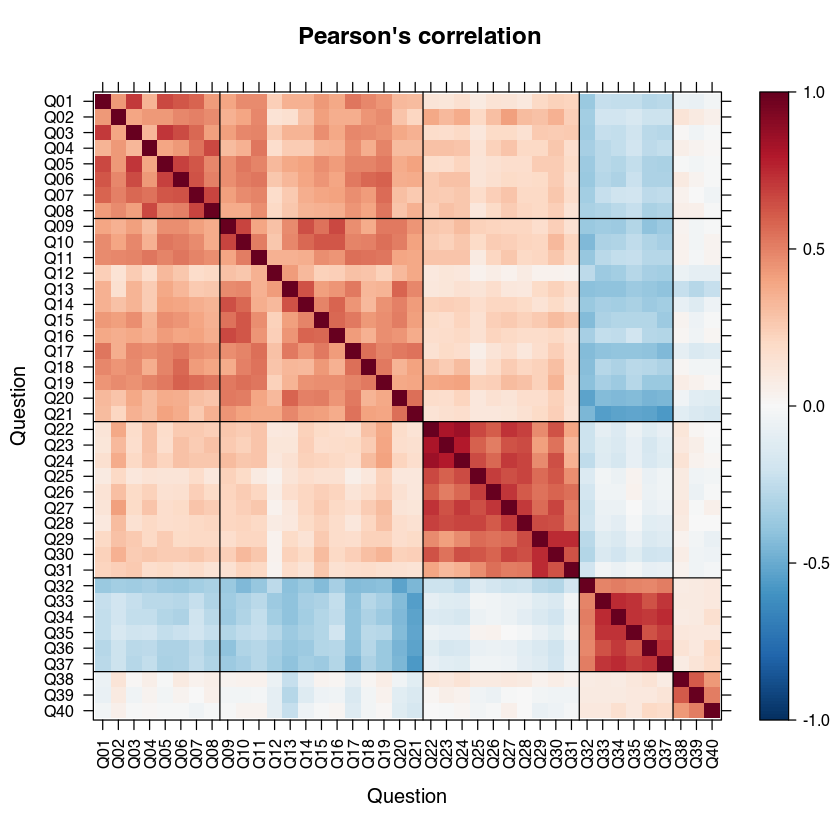

In [11]:
cols = colorRampPalette(rev(brewer.pal(11, "RdBu"))) # 'PuOr')))

levelplot(t(corr_pears_all$r[c(nrow(corr_pears_all$r):1) , ]), scales=list(x=list(rot=90)), col.regions=cols, main = 'Pearson\'s correlation', xlab = 'Question', ylab = 'Question', at=seq(-1, 1, length=200), 
          panel = function(...) {
          panel.levelplot(...)
          panel.abline(v = 8.5, h = 32.5)
          panel.abline(v = 21.5, h = 19.5)
          panel.abline(v = 31.5, h = 9.5)
          panel.abline(v = 37.5, h = 3.5)
          }
        )

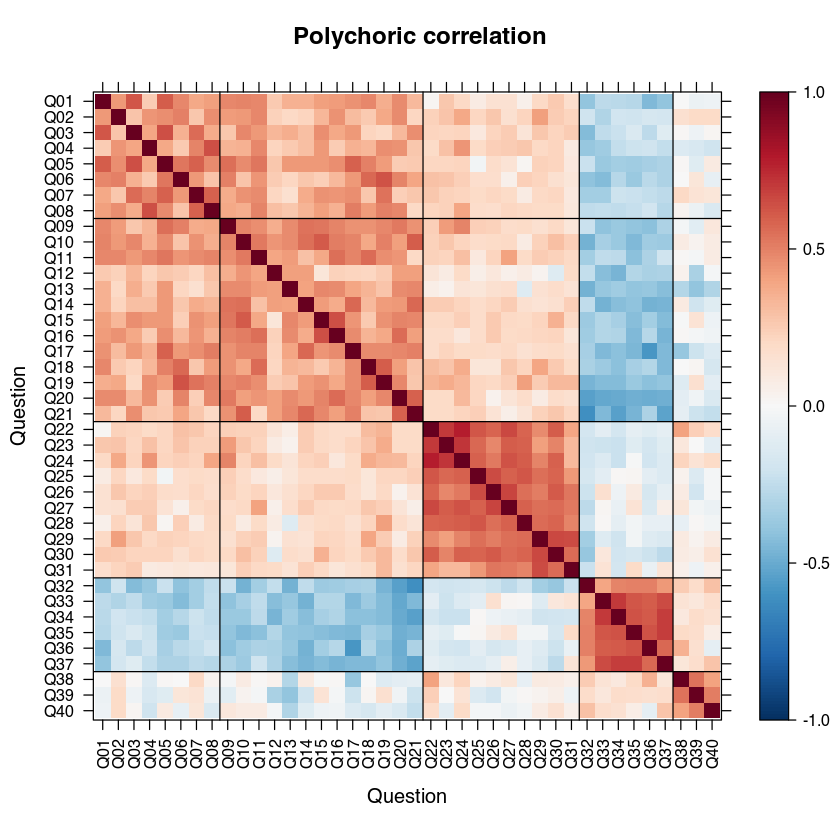

In [12]:
levelplot(t(corr_poly_all$rho[c(nrow(corr_poly_all$rho):1) , ]), scales=list(x=list(rot=90)), col.regions=cols, main = 'Polychoric correlation', xlab = 'Question', ylab = 'Question', at=seq(-1, 1, length=200), 
          panel = function(...) {
          panel.levelplot(...)
          panel.abline(v = 8.5, h = 32.5)
          panel.abline(v = 21.5, h = 19.5)
          panel.abline(v = 31.5, h = 9.5)
          panel.abline(v = 37.5, h = 3.5)
          }
        )

In [13]:
library(MASS)
write.matrix(corr_pears_all$r, 'behavioral_correlation_mturk.csv', sep = ',')


Attaching package: ‘MASS’

The following object is masked _by_ ‘.GlobalEnv’:

    survey

The following object is masked from ‘package:dplyr’:

    select

